# **TP 4 - Computational Statistics** 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# **1.A – Metropolis-Hastings within Gibbs sampler**

In [2]:
import numpy as np
from utils_stats import MHGibbs
import matplotlib.pyplot as plt
from utils_stats import target_distribution
import pandas as pd

## Question 1 et 2

Mean Acceptance rate x: 0.8508000000000001
Mean Acceptance rate y: 0.25780000000000003


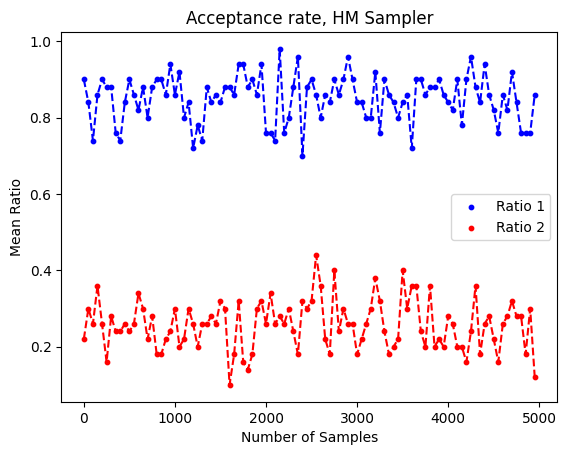

In [3]:
sigma1 = 3
sigma2 = 3

chain, acceptance_rates = MHGibbs(0, 0, sigma1, sigma2, a=10, n=5000)

plt.scatter(np.arange(100) * 50, acceptance_rates[0, :], marker='o', color='blue', s=10, label='Ratio 1')
plt.plot(np.linspace(0, 4950, 100), acceptance_rates[0, :], '--', color='blue')
plt.scatter(np.arange(100) * 50, acceptance_rates[1, :], marker='o', color='red', s=10, label='Ratio 2')
plt.plot(np.linspace(0, 4950, 100), acceptance_rates[1, :], '--', color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Ratio')
plt.title("Acceptance rate, HM Sampler")
plt.legend()
plt.show()

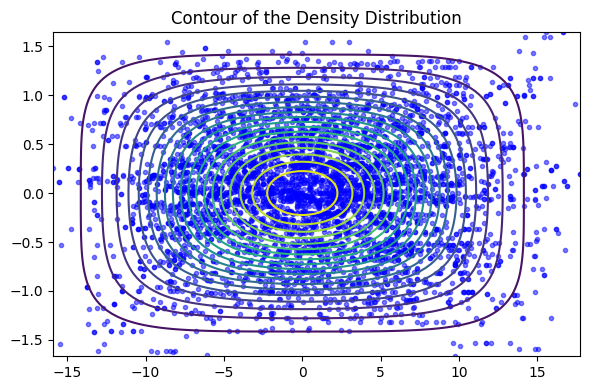

In [4]:
x = np.linspace(np.min(chain[:, 0]), np.max(chain[:, 0]), 100)
y = np.linspace(np.min(chain[:, 1]), np.max(chain[:, 1]), 100)
X, Y = np.meshgrid(x, y)

Z = target_distribution(X, Y, a=10)

fig = plt.figure(figsize=(6, 4))
plt.plot(chain[:, 0], chain[:, 1], 'o', color='blue', markersize=3, alpha=0.5)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.title('Contour of the Density Distribution')
plt.tight_layout()
plt.show()

Le plot précédent montre que le `taux d'acceptation` pour $x$ est très élevé (autour de $0.85$), ce qui crée un sur-échatillonnage dans certaines zones, tandis que celui de $y$ est faible (autour de $0.25$), ce qui ne permet pas à la chaîne d'explorer $y$.

Cela peux suggérer que le choix de $\sigma_1$ et $\sigma_2$ n'est pas le bon.

## Question 3

On peut prendre différente valeurs pour $\sigma_1$ et $\sigma_2$. Ainsi, on pourra observerr si le`taux d'acceptation` de $x$ diminue et s'égalise pour les deux différentes dimensions. 

Testons cela pour $\sigma_1 = 20$:

Mean Acceptance rate x: 0.3764
Mean Acceptance rate y: 0.25660000000000005


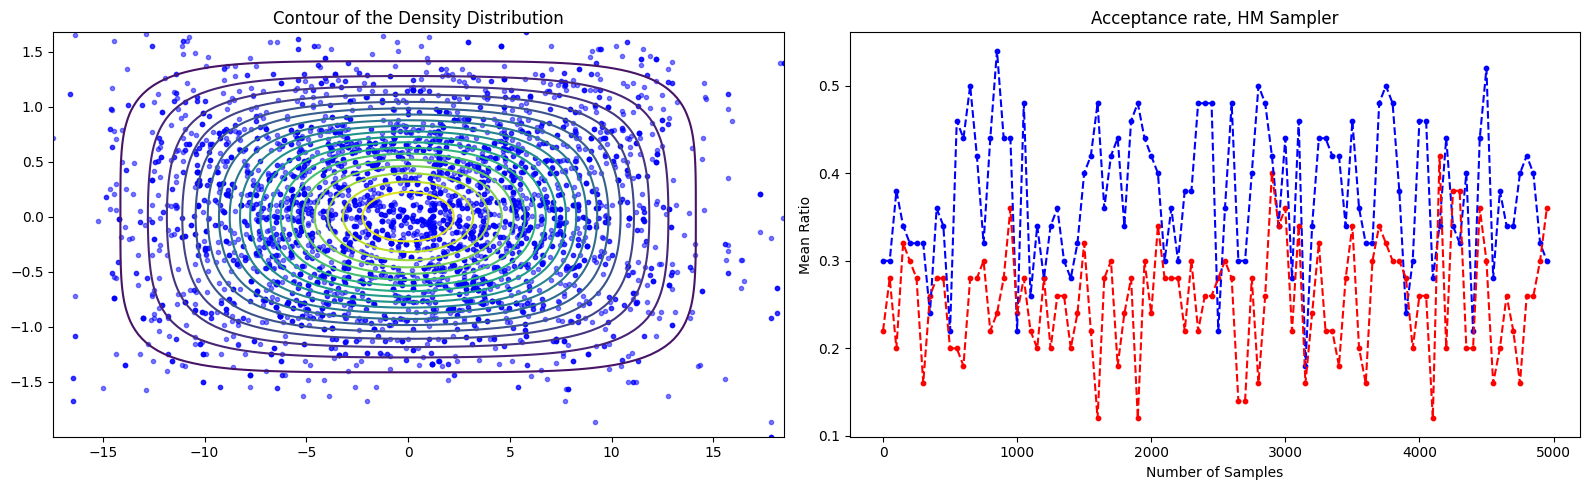

In [5]:
sigma1 = 20
sigma2 = 3

chain, acceptance_rates = MHGibbs(0, 0, sigma1, sigma2, a=10, n=5000)

x = np.linspace(np.min(chain[:, 0]), np.max(chain[:, 0]), 100)
y = np.linspace(np.min(chain[:, 1]), np.max(chain[:, 1]), 100)
X, Y = np.meshgrid(x, y)

Z = target_distribution(X, Y, a=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(chain[:, 0], chain[:, 1], 'o', color='blue', markersize=3, alpha=0.5)
ax1.contour(X, Y, Z, levels=20, cmap='viridis')
ax1.set_title('Contour of the Density Distribution')

ax2.scatter(np.arange(100) * 50, acceptance_rates[0, :], marker='o', color='blue', s=10, label='Ratio 1')
ax2.plot(np.linspace(0, 4950, 100), acceptance_rates[0, :], '--', color='blue')
ax2.scatter(np.arange(100) * 50, acceptance_rates[1, :], marker='o', color='red', s=10, label='Ratio 2')
ax2.plot(np.linspace(0, 4950, 100), acceptance_rates[1, :], '--', color='red')
ax2.set_xlabel('Number of Samples')
ax2.set_ylabel('Mean Ratio')
ax2.set_title("Acceptance rate, HM Sampler")

plt.tight_layout()
plt.show()

Les `taux d'acceptations` sont plus équilibrés que précédemment, et on échantillonne mieux : la majorité des échantillons sont dans le `contour plot`.

En baissant le taux alpha qui permet d'échantillonner dans $x$, on peut également obtenir de meilleurs résultats.

# **1.B – Adaptive Metropolis-Hastings within Gibbs sampler**

## Question 1

In [6]:
from utils_stats import Adaptive_MHG

a = 10
n_batch = 500
batch_size = 50

# test for adaptive MH within Gibbs
adapted_chain, adapted_accepted, L = Adaptive_MHG(0, 0, a, n_batch, batch_size)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 2816.05it/s]


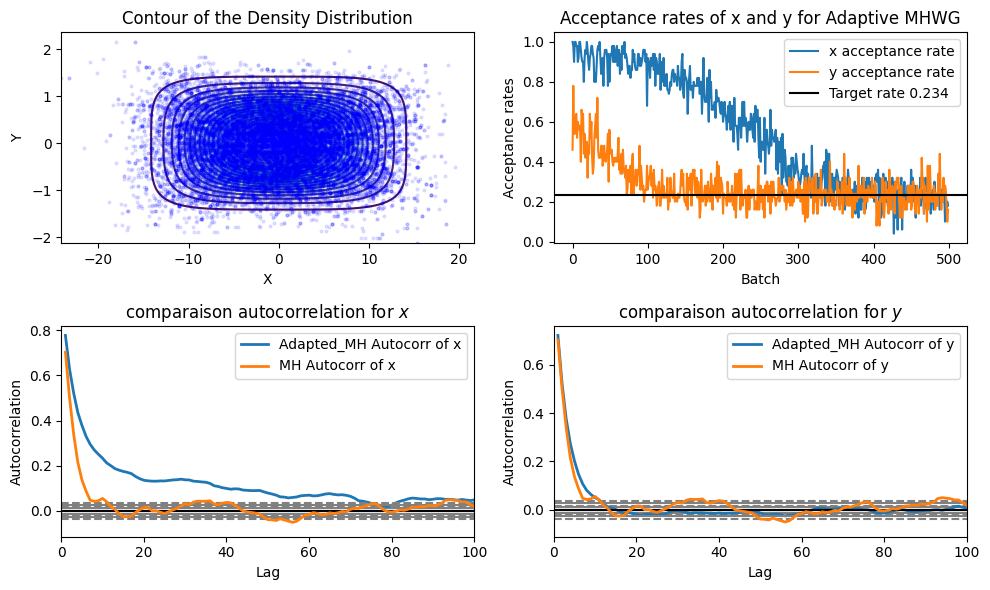

In [8]:
x = np.linspace(np.min(adapted_chain[:, 0]), np.max(chain[:, 0]), 100)
y = np.linspace(np.min(adapted_chain[:, 1]), np.max(chain[:, 1]), 100)
X, Y = np.meshgrid(x, y)

Z = target_distribution(X, Y, a=10)

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0,0].contour(X, Y, Z, levels=20, cmap='viridis')
axs[0,0].plot(adapted_chain[:, 0], adapted_chain[:, 1], 'o', color='blue', markersize=2, alpha=0.1)
axs[0,0].set_xlabel('X')
axs[0,0].set_ylabel('Y')
axs[0,0].set_title('Contour of the Density Distribution')

axs[0,1].plot(adapted_accepted[:, 0], label = "x acceptance rate")
axs[0,1].plot(adapted_accepted[:, 1], label = "y acceptance rate")
axs[0,1].axhline(y=0.234, color = "black", label="Target rate 0.234")
axs[0,1].set_title("Acceptance rates of x and y for Adaptive MHWG")
axs[0, 1].set_xlabel("Batch")
axs[0,1].set_ylabel("Acceptance rates")
axs[0, 1].legend()

# plot auto-correlations
pd.plotting.autocorrelation_plot(adapted_chain[:, 0], ax=axs[1, 0], label='Adapted_MH Autocorr of x', linewidth=2)
pd.plotting.autocorrelation_plot(chain[:, 1], ax=axs[1, 0], label='MH Autocorr of x', linewidth=2)
axs[1, 0].set_title(r'comparaison autocorrelation for $x$')
axs[1, 0].set_xlim(0, 100)
axs[1, 0].legend()

pd.plotting.autocorrelation_plot(adapted_chain[:, 1], ax=axs[1, 1], label='Adapted_MH Autocorr of y', linewidth=2)
pd.plotting.autocorrelation_plot(chain[:, 1], ax=axs[1, 1], label='MH Autocorr of y', linewidth=2)
axs[1, 1].set_title(r'comparaison autocorrelation for $y$')
axs[1, 1].set_xlim(0, 100)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

En observant l'évolution des `taux d'acceptations`, on remarque que pour l'**Adaptive Metropolis-Hasting algorithm**, ils convergent vers la valeur optimale de **$0.234$**.

## Question 2:

Utilisons cette même méthode pour maintenant simuler selon une densité cible plus complexe.

In [9]:
from utils_stats import Adaptive_HM_banana

In [10]:
d = 20
proba = np.ones(d)
n_samples = 5000
initial_state = np.zeros(d)

banana_chain, accepted = Adaptive_HM_banana(n_samples, d, initial_state, proba)

100%|██████████| 5000/5000 [00:01<00:00, 3156.60it/s]


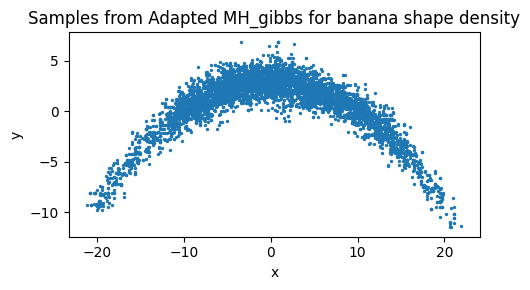

In [12]:
plt.figure(figsize=(5, 3))
plt.scatter(banana_chain[:, 0], banana_chain[:, 1], s=2)
plt.title("Samples from Adapted MH_gibbs for banana shape density")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# **2.A - A toy example**

In [13]:
# énoncé
mu = np.array([ [2.18, 5.76], [8.67,9.59 ], [4.24, 8.48], [ 8.41,1.68],  
      [3.93, 8.82],  [3.25,3.47 ], [1.70, 0.50], [4.59, 5.60], 
      [ 6.91, 5.81], [6.87, 5.40], [5.41, 2.65], [2.70, 7.88], 
      [4.98,3.70 ], [1.14, 2.39],  [8.33, 9.50], [4.93, 1.50], 
      [1.83, 0.09], [2.26, 0.31], [5.54,  6.86], [1.69, 8.11]
])
w = 0.05
sigma = 0.1
x = np.zeros(2)

n_samples = 2000

## Question 1

In [14]:
from utils_stats import MH_SRW

chain = MH_SRW(n_samples, x, w, mu, sigma)

100%|██████████| 4000/4000 [00:45<00:00, 88.03it/s] 


## Question 2

On peut voir que certaines moyennes de la mixture gaussienne n'ont aucuns échantillons autour d'elles, signifiant que l'**algorithme** n'échantillone pas selon ces gaussiennes spécifiques. De même pour l'**Adaptive-MH-RW**:

In [15]:
from utils_stats import Adaptative_MH_RW

adapted_chain = Adaptative_MH_RW(n_samples, x, w, mu, sigma)

100%|██████████| 4000/4000 [00:42<00:00, 93.04it/s] 


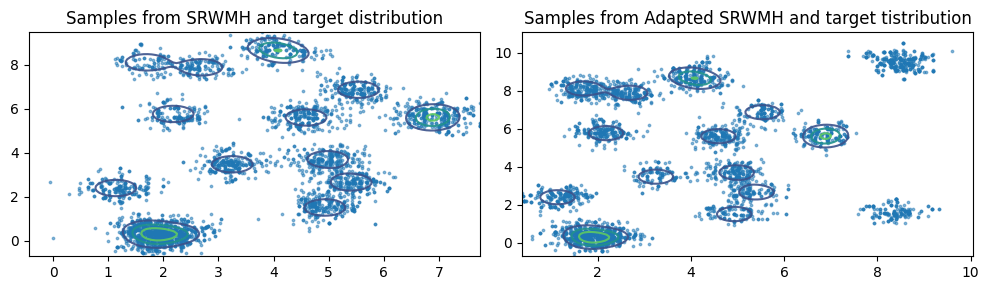

In [18]:
from utils_stats import target_gaussian_density
x = np.linspace(np.min(adapted_chain[:, 0]), np.max(chain[:, 0]), 100)
y = np.linspace(np.min(adapted_chain[:, 1]), np.max(chain[:, 1]), 100)
X, Y = np.meshgrid(x, y)

XY = np.stack([X.ravel(), Y.ravel()], axis=1)
Z = np.array([target_gaussian_density(z, w, mu, sigma) for z in XY]).reshape(X.shape)

plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.contour(X, Y, Z, levels=3, cmap="viridis", alpha=0.9)
plt.scatter(chain[:, 0], chain[:, 1], s=3, alpha=0.5)
plt.title("Samples from SRWMH and target distribution")

plt.subplot(1,2,2)
plt.contour(X, Y, Z, levels=3, cmap="viridis", alpha=0.9)
plt.scatter(adapted_chain[:, 0], adapted_chain[:, 1], s=3, alpha=0.5)
plt.title("Samples from Adapted SRWMH and target tistribution")
plt.tight_layout()
plt.show()

# **2.B – Parallel Tempering**

## Question 1

In [19]:
from utils_stats import Parrallel_Tempering

x = np.zeros(2)

temperatures = [60, 21.6, 7.7, 2.8, 1]
parallel_samples = Parrallel_Tempering(n_samples, temperatures, x, w, mu, sigma)

100%|██████████| 4000/4000 [04:50<00:00, 13.79it/s]


## Question 2 

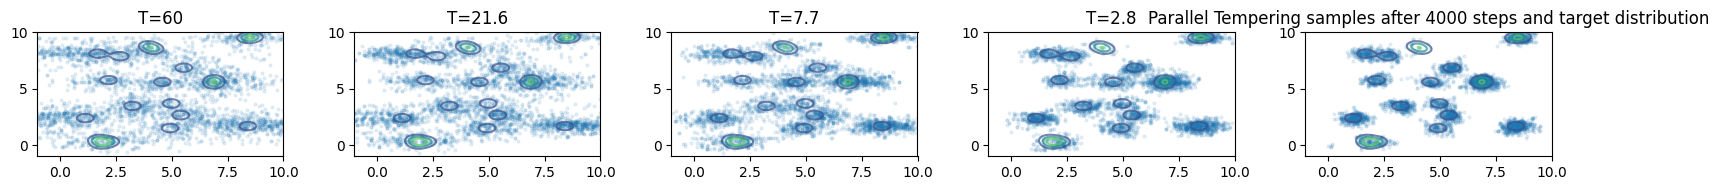

In [21]:
X = np.linspace(-1, 10, 200)
Y = np.linspace(-1, 10, 200)
X, Y = np.meshgrid(X, Y)

XY = np.stack([X.ravel(), Y.ravel()], axis=1)
Z = np.array([target_gaussian_density(z, w, mu, sigma) for z in XY]).reshape(X.shape)

K = len(temperatures)
plt.figure(figsize=(16, 2))
for i in range(K):
    plt.subplot(1, K, i+1)
    plt.xlim(-1, 10)
    plt.ylim(-1, 10)
    plt.scatter(parallel_samples[i, :, 0], parallel_samples[i, :, 1], s=4, alpha=0.1)
    plt.contour(X, Y, Z, levels=3, cmap="viridis", alpha=0.7)
    plt.title(f"T={temperatures[i]}")
plt.title(f"Parallel Tempering samples after {n_samples} steps and target distribution")

plt.tight_layout()
plt.show()

On remarque qu'avec l'**algorithme de Parallel Tempering** on a bien toute la distribution qui est explorée, et on arrive à simuler selon l'entièreté de la mixture gaussienne.

# **3: Bayesian analysis of a one-way random effects model**

## Question 1

Voir rapport pdf

## Question 2

Voir rapport pdf

In [22]:
from utils_stats import gibbs

## Question 3

Voir rapport pdf

In [23]:
from utils_stats import block_gibbs

## Question 5

In [25]:
# hyper-parametres
alpha = .5
beta = .5
gamma = .5

# parametres
mu = 4
sigma = 2
tau = 1

n_samples = 1500

# Y
N, k = 100, 100
ki = [10 for i in range(k)] 
Y = np.zeros((N, k))

for i in range(N):
    X_i = np.random.normal(mu, sigma)
    eps = np.random.normal(0, tau, size=k)
    Y[i, :] = X_i + eps

In [26]:
sigma_g, tau_g, mu_g, X_g = gibbs(2, 2, 2, np.zeros(N), Y, N, k, beta, alpha, gamma, n_samples)
block_sigma, block_tau, block_mu, block_X = block_gibbs(2, 2, 2, np.zeros(N), Y, N, k, beta, alpha, gamma, n_samples)

  0%|          | 0/1500 [00:00<?, ?it/s]

100%|██████████| 1500/1500 [00:05<00:00, 258.32it/s]


In [27]:
print(f'Target parameters: mu: {mu}, sigma: {sigma}, tau: {tau} \n')
print(f'Parameters at end of gibbs: mu: {mu_g[-1]}, sigma: {sigma_g[-1]}, tau: {tau_g[-1]} \n')
print(f'Parameters at end of block_gibbs: mu: {block_mu[-1]}, sigma: {block_sigma[-1]}, tau: {block_tau[-1]}')

Target parameters: mu: 4, sigma: 2, tau: 1 

Parameters at end of gibbs: mu: 4.090361343705467, sigma: 3.3886709617953383, tau: 0.983220392898878 

Parameters at end of block_gibbs: mu: 3.7508512426872205, sigma: 4.56883200850744, tau: 0.9893321381155772


Après plusieurs tests, on remarque que les deux méthodes arrivent plutôt bien à se rapprocher des vraies valeurs des paramètres. Par ailleurs, cela dépend beaucoup des hyperparamètres $\alpha$, $\beta$, et $\gamma$.
Quand bien même, l'agorithme `block_gibbs` approche mieux en moyenne les paramètres cibles.

Pour obtenir des algorithmes optimaux, il faudrait réaliser un grid search sur les hyperparamètres, y compris les dimensions $N$ et $k$ ainsi que les valeurs initiales de $\mu$, $\sigma$ et $\tau$.